<div style="text-align: center; color: #9900cc; font-family: 'Montserrat', sans-serif; font-size: 36px; font-weight: bold;">Segmentez des clients d'un site e-commerce</div>

Ce notebook explorera plusieurs méthodes de segmentation pour déterminer la plus efficace.

# Importation des bibliotheques

In [92]:
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

# Importation des données

In [68]:
data=pd.read_csv('Dataframe1.csv')

In [70]:
RFM_data=pd.read_csv('RFM.csv')

# K-MEANS

## Normalisation

In [10]:
numerical_columns = RFM_data.select_dtypes(include='number')
SS=StandardScaler()
X=pd.DataFrame(SS.fit_transform(numerical_columns), columns=numerical_columns.columns)

## Choix du meilleurs hyperparametres

Pour choisir le meilleur hyperparametres ,nous avons utilisées deux méthodes silhouette_score et WCSS 

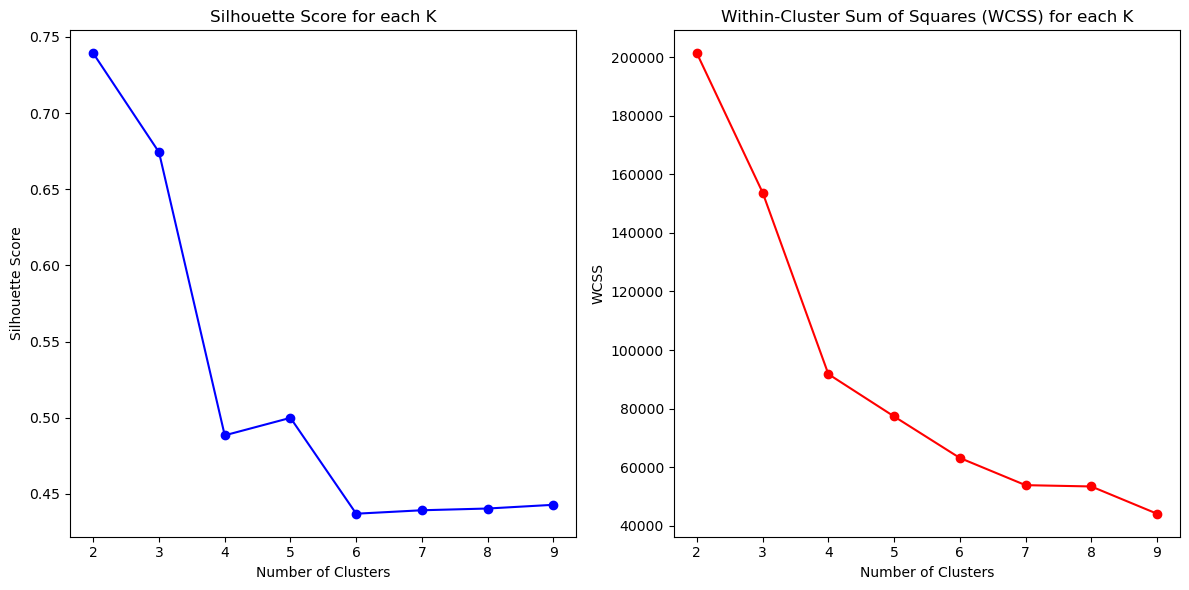

In [11]:
k_values = range(2, 10)

silhouette_scores = []
wcss = []

# Appliquer k-means pour différentes valeurs de k
for k in k_values:
    # Créer un modèle k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Calculer le score de silhouette
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)
    
    # Calculer WCSS
    wcss.append(kmeans.inertia_)

# Tracer les métriques pour évaluer le nombre optimal de clusters
plt.figure(figsize=(12, 6))

# Plot Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each K')

# Plot WCSS
plt.subplot(1, 2, 2)
plt.plot(k_values, wcss, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares (WCSS) for each K')

plt.tight_layout()
plt.show()

Meilleur nombre de cluster et entre 4 et 5.

In [17]:
def clustering_kmeans(X, num_clusters):
    # Initialiser le modèle KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    # Appliquer le clustering sur les données
    kmeans.fit(X)
    # Récupérer les étiquettes des clusters
    labels = kmeans.labels_
    return labels

## Choix de k

In [18]:
#k=4
labels = clustering_kmeans(X, 4)
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Nombre d'individus dans chaque cluster:")
print(cluster_counts)

Nombre d'individus dans chaque cluster:
{0: 37489, 1: 2775, 2: 2460, 3: 50648}


In [19]:
#k=5
labels = clustering_kmeans(X, 5)
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Nombre d'individus dans chaque cluster:")
print(cluster_counts)

Nombre d'individus dans chaque cluster:
{0: 36228, 1: 2776, 2: 637, 3: 48972, 4: 4759}


En tenant compte de ces observations, nous pourrions choisir k=4 comme le nombre optimal de clusters dans cet exemple, car il offre une répartition plus uniforme des individus entre les clusters par rapport à k=5, malgré la présence d'un cluster avec un nombre d'individus plus faible.

## Stabilité de Clusters

In [24]:
# Diviser les données en trois parties
X1 = X[:32032]
X2 = X[32032:64064]
X3 = X[64064:96096]
# Appliquer l'algorithme de clustering à l'ensemble de données entier
kmeans1= KMeans(n_clusters=4, random_state=42)
kmeans2= KMeans(n_clusters=4, random_state=42)
kmeans1.fit(X1)
kmeans2.fit(X2)
label3_1=kmeans1.predict(X3)
label3_2=kmeans2.predict(X3)
# Calculer l'Adjusted Rand Index (ARI) entre les paires de clusters
ari_3 = adjusted_rand_score(label3_1, label3_2)
print("ARI entre les ensembles de clusters 1 et 2 :", ari_3)

ARI entre les ensembles de clusters 1 et 2 : 0.9746929307207006


Un ARI (Adjusted Rand Index) de 0.9746929307207006 entre les ensembles de clusters 1 et 2 indique une très forte similarité entre les deux ensembles de clusters. Cela signifie que les clusters produits par les deux modèles de clustering (kmeans1 et kmeans2) sont très cohérents et présentent une correspondance élevée.

# T-sne avec clustring

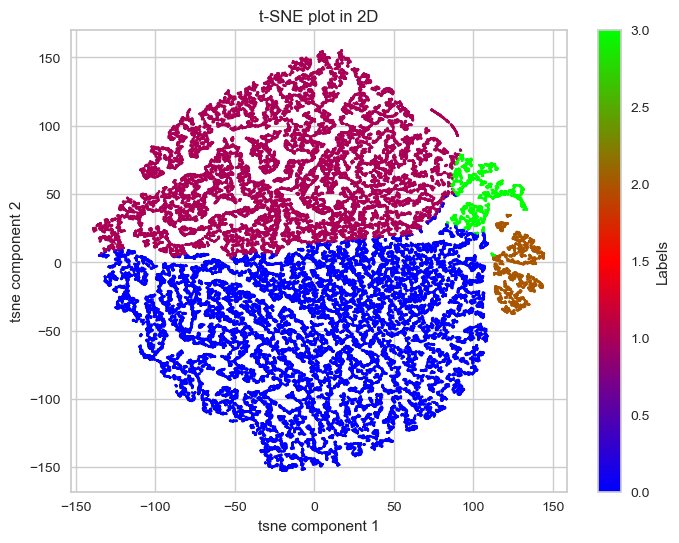

In [28]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])
kmeans = KMeans(n_clusters=4, random_state=42)
# Train and make predictions
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(8,6))
# Utilisez les colonnes de tsne_df pour x et y, et spécifiez les labels pour la couleur
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=2)
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.colorbar(label='Labels')  
plt.show()

    Validation des Clusters : La division cohérente des données en quatre clusters à la fois par KMeans et t-SNE suggère que les clusters identifiés par KMeans sont bien définis et significatifs. Cela confirme la validité des clusters trouvés 
    par l'algorithme de clustering.

    Structures Intrinsèques : Les quatre clusters dans la visualisation t-SNE représentent des structures intrinsèques dans les données, qui peuvent être mieux mises en évidence par la réduction de dimensionnalité. Chaque cluster peut 
    représenter des groupes d'observations similaires en termes de caractéristiques ou de comportements.

    Similarité des Clusters : La cohérence entre les clusters identifiés par KMeans et ceux révélés dans la visualisation t-SNE suggère une forte similarité entre les clusters dans l'espace d'origine et dans l'espace réduit. Cela indique que 
    les clusters conservent leur structure et leur composition malgré la réduction de dimensionnalité.

# graphe 3D RFM avec clustring

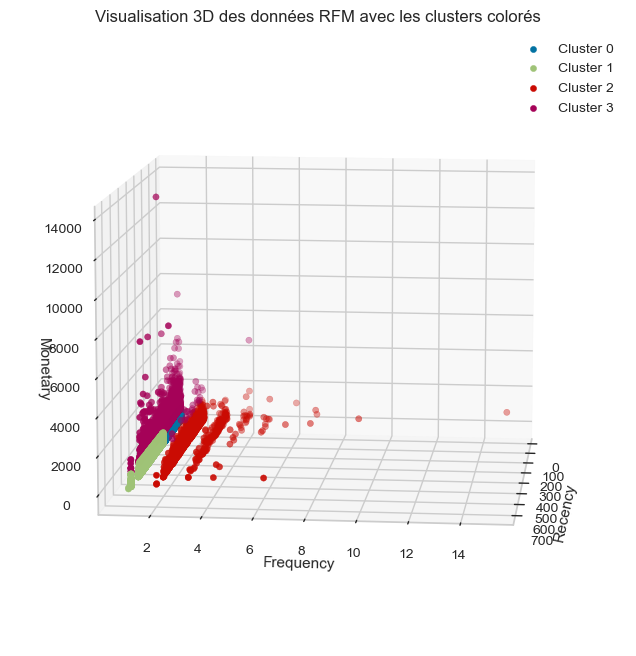

In [29]:
#RFM
rfm_data = RFM_data[['Recency', 'Frequency', 'monetary']]
# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les données RFM en 3D en colorant les points par cluster
for cluster in range(4):
    ax.scatter(rfm_data.loc[clusters == cluster, 'Recency'], 
               rfm_data.loc[clusters == cluster, 'Frequency'], 
               rfm_data.loc[clusters == cluster, 'monetary'], 
               label=f'Cluster {cluster}')

# Ajouter des étiquettes d'axes et un titre
ax.view_init(elev=10, azim=6)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Visualisation 3D des données RFM avec les clusters colorés')
ax.legend()

plt.show()

# Analyse statistiques des clusters

In [30]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)
RFM_data['Cluster'] = cluster_labels
RFM_data.groupby('Cluster').mean().T

C:\Users\HP\AppData\Local\Temp\ipykernel_11620\3292282487.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RFM_data.groupby('Cluster').mean().T


Cluster,0,1,2,3
Recency,131.409407,391.965413,224.659222,245.344948
Frequency,1.000000,1.000000,2.112032,1.012002
monetary,131.981533,130.457400,285.284737,1117.332478


Ces chiffres représentent les valeurs moyennes des mesures de récence, de fréquence et de montant monétaire pour chaque cluster:
    Recency (Récence) :
        Cluster 1 : La récence moyenne est d'environ 131 jours.
        Cluster 2 : La récence moyenne est d'environ 392 jours.
        Cluster 3 : La récence moyenne est d'environ 225 jours.
        Cluster 4 : La récence moyenne est d'environ 245 jours.

    Frequency (Fréquence) :
        Cluster 1 : La fréquence moyenne est d'environ 1 achat.
        Cluster 2 : La fréquence moyenne est d'environ 1 achat.
        Cluster 3 : La fréquence moyenne est d'environ 2,1 achats.
        Cluster 4 : La fréquence moyenne est d'environ 1,01 achat.

    Monetary (Montant Monétaire) :
        Cluster 1 : Le montant monétaire moyen est d'environ 132 unités monétaires.
        Cluster 2 : Le montant monétaire moyen est d'environ 130 unités monétaires.
        Cluster 3 : Le montant monétaire moyen est d'environ 285 unités monétaires.
        Cluster 4 : Le montant monétaire moyen est d'environ 1117 unités monétaires.

Ces chiffres permettent de comparer les différents clusters en termes de comportement d'achat des clients. Par exemple, le cluster 4 semble avoir une récence relativement faible mais un montant monétaire élevé, indiquant peut-être des clients qui ont récemment effectué des achats importants. En revanche, le cluster 2 semble avoir une récence élevée et un montant monétaire faible, ce qui pourrait indiquer des clients qui n'ont pas acheté depuis longtemps ou qui dépensent moins. 

## Distribution des clusters

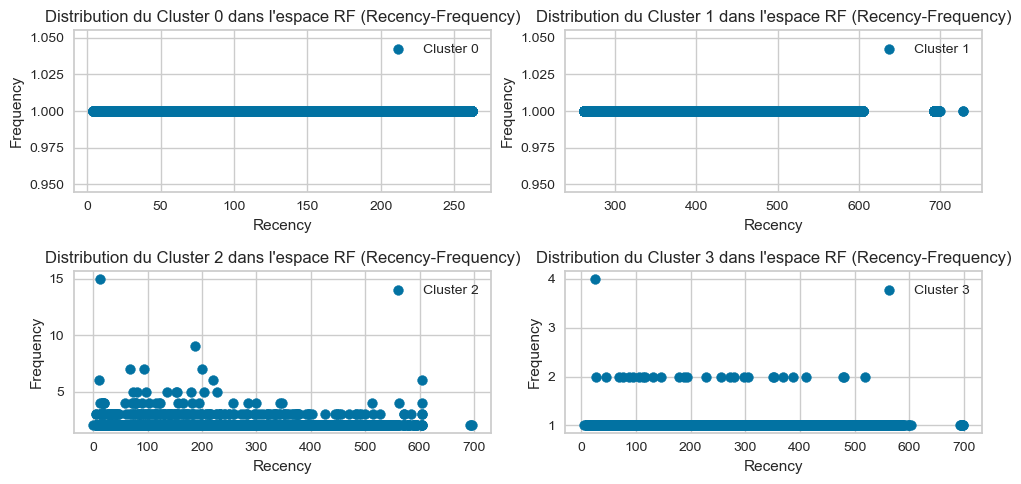

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
# Boucle sur chaque cluster
for cluster in range(4):
    cluster_data = RFM_data[RFM_data['Cluster'] == cluster]
    # Sélectionner la position du sous-graphe
    ax = axs[int(cluster/2), cluster%2]
    # Tracer les points du cluster sur le sous-graphe correspondant
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], s=50, label=f'Cluster {cluster}')
    ax.set_title(f'Distribution du Cluster {cluster} dans l\'espace RF (Recency-Frequency)')
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)
# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.show()

# Ajouter la colonne review score

In [73]:
average_review_score_per_customer = data.groupby('customer_unique_id')['review_score'].mean()
RFM_data['average_review_score'] = RFM_data['customer_unique_id'].map(average_review_score_per_customer)

In [74]:
RFM_data.columns
RFM_data=RFM_data.drop('Cluster',axis=1)

KeyError: "['Cluster'] not found in axis"

In [75]:
RFM_data.columns

Index(['customer_unique_id', 'Recency', 'Frequency', 'monetary',
       'total_orders', 'average_review_score'],
      dtype='object')

## PCA avec review_score

In [76]:
RFM_columns = ['Recency', 'Frequency', 'monetary', 'average_review_score']

# Extraction des données RFM
RFM_da = RFM_data[RFM_columns]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_da)

# PCA avec 4 composantes principales
pca = PCA(n_components=4)  
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Création d'un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Affichage des premières lignes du DataFrame PCA
print(pca_df.head())

        PC1       PC2       PC3       PC4
0 -0.199510  1.000111 -0.257501 -0.264738
1 -0.430548  0.505606 -0.721784  0.299248
2 -0.427276 -1.851531  0.917382  0.451778
3 -0.532835 -0.373132  0.302451  0.310666
4 -0.158131  0.225491  0.625669 -0.381709


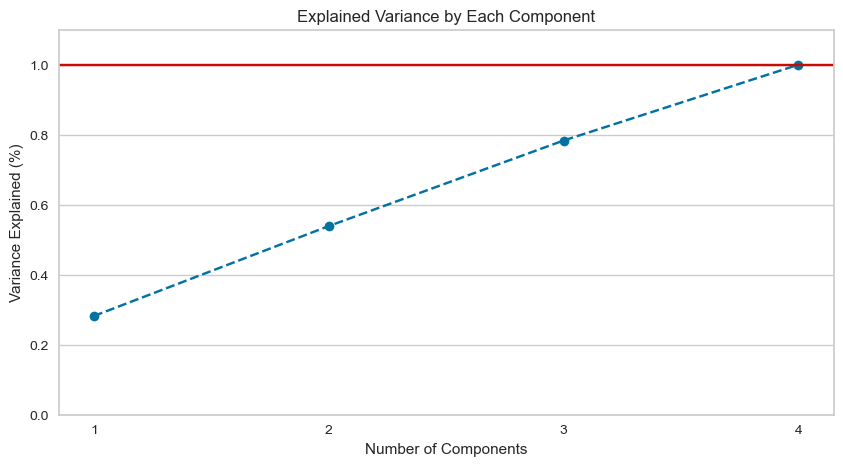

In [77]:
xi = np.arange(1, 1 + len(pca_df.columns), step=1)

# Calcul de la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracé de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 5))
plt.plot(xi, cumulative_variance, marker='o', linestyle='--', color='b')

# Configuration des axes et du titre
plt.ylim(0.0, 1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1 + len(pca_df.columns), step=1))
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Each Component')

# Ajout d'une ligne rouge à 1 pour la référence
plt.axhline(y=1, color='r', linestyle='-')

# Affichage de la grille seulement sur l'axe y
plt.gca().xaxis.grid(False)

# Affichage du graphique
plt.show()

Dans ce graphe de l'Analyse en Composantes Principales (ACP), chaque composant principal capture une part spécifique de la variance des données. Le premier composant explique 30 % de la variance, le deuxième 50 %, le troisième 80 %, et le quatrième 100 %. Cette distribution de la variance met en évidence l'importance croissante des composants successifs dans la représentation des données, avec une grande part de la variance déjà expliquée par les trois premiers composants principaux.

## Tsne avec review_score

In [78]:
sample_data = RFM_data.sample(frac=0.3, random_state=42)

# Sélectionner les colonnes 'Recency', 'Frequency', et 'Monetary' pour l'analyse t-SNE
X_sample = sample_data[['Recency', 'Frequency', 'monetary','average_review_score']]

# Instancier et appliquer t-SNE
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(X_sample)

# Créer un DataFrame avec les données transformées par t-SNE
tsne_df = pd.DataFrame(data=X_2d, columns=['TSNE1', 'TSNE2'])

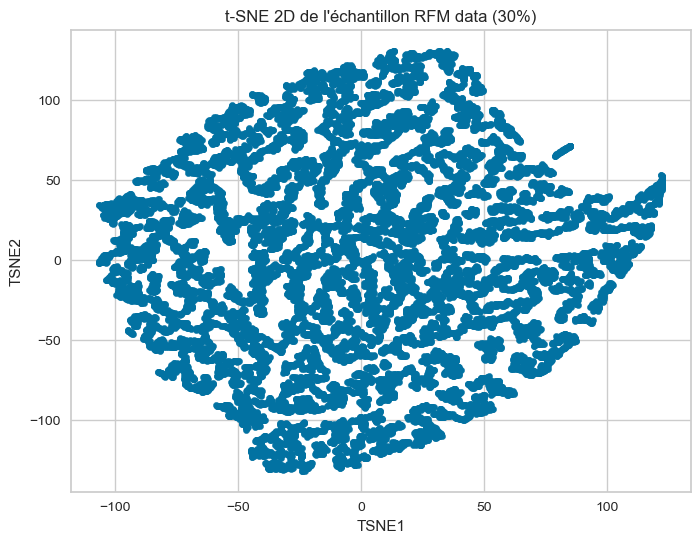

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], s=20)
plt.title('t-SNE 2D de l\'échantillon RFM data (30%)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.show()

## Choix de nombre de clusters

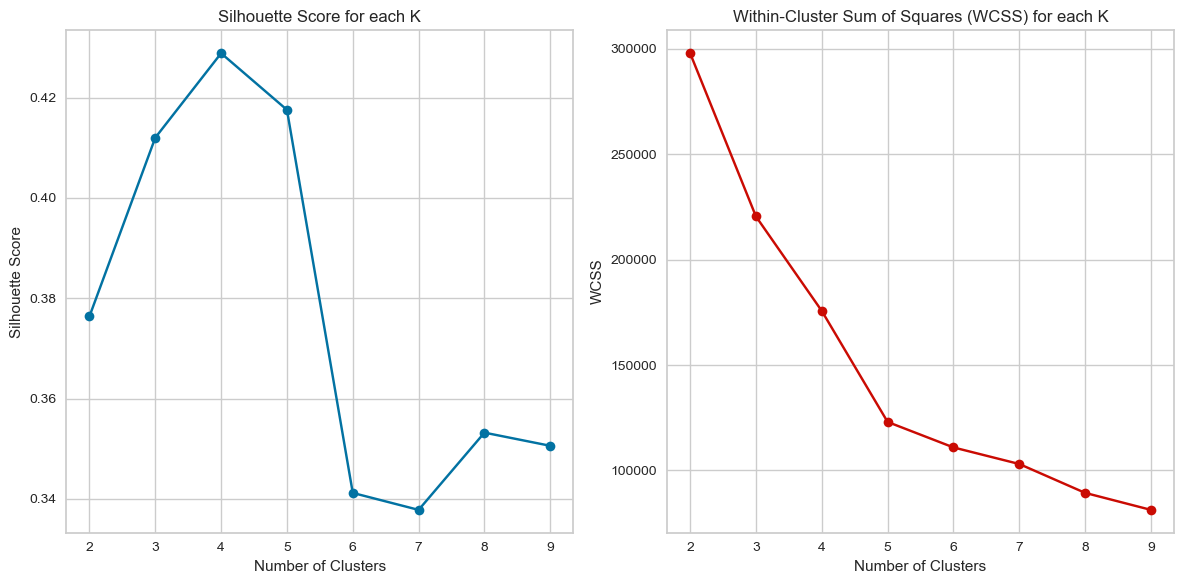

In [55]:
k_values = range(2, 10)

silhouette_scores = []
wcss = []

# Appliquer k-means pour différentes valeurs de k
for k in k_values:
    # Créer un modèle k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    # Calculer le score de silhouette
    silhouette = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette)
    
    # Calculer WCSS
    wcss.append(kmeans.inertia_)

# Tracer les métriques pour évaluer le nombre optimal de clusters
plt.figure(figsize=(12, 6))

# Plot Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each K')

# Plot WCSS
plt.subplot(1, 2, 2)
plt.plot(k_values, wcss, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares (WCSS) for each K')

plt.tight_layout()
plt.show()

A partir des graphes le meilleur nombre des clusters et entre 4 et 5.

## Analyse statistiques des clusters

In [56]:
#k=4
labels = clustering_kmeans(scaled_data, 4)
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Nombre d'individus dans chaque cluster:")
print(cluster_counts)

Nombre d'individus dans chaque cluster:
{0: 68434, 1: 19842, 2: 2321, 3: 2775}


In [57]:
#k=5
labels = clustering_kmeans(scaled_data, 5)
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Nombre d'individus dans chaque cluster:")
print(cluster_counts)

Nombre d'individus dans chaque cluster:
{0: 41274, 1: 16195, 2: 2034, 3: 2775, 4: 31094}


En tenant compte de ces observations, nous pourrions choisir k=5 comme le nombre optimal de clusters dans cet exemple, car il offre une répartition plus uniforme des individus entre les clusters par rapport à k=4, malgré la présence d'un cluster avec un nombre d'individus plus faible.

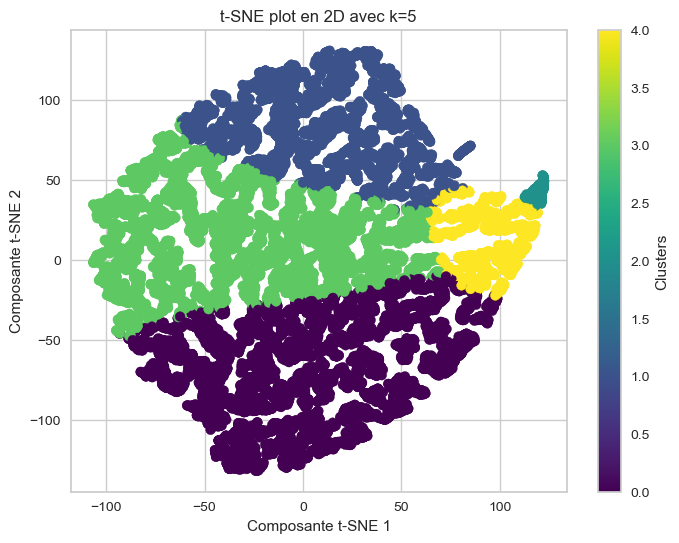

In [62]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_sample)
clusters = kmeans.labels_

# Ajouter les labels des clusters au DataFrame tsne_df
tsne_df['Cluster'] = clusters

# Tracer le graphique t-SNE avec les clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=clusters, cmap='viridis')
plt.title('t-SNE plot en 2D avec k=5')
plt.xlabel('Composante t-SNE 1')
plt.ylabel('Composante t-SNE 2')
plt.colorbar(label='Clusters')
plt.show()

La combinaison de t-SNE avec KMEANS à cinq clusters offre une interprétation claire de la structure sous-jacente de nos données. Les cinq clusters distincts identifiés reflètent des sous-groupes homogènes avec des caractéristiques similaires, fournissant ainsi des insights précieux sur la distribution et les relations au sein de nos données.

## Analyses statistiques des clusters

In [66]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
RFM_data['Cluster'] = cluster_labels
RFM_data.groupby('Cluster').mean().T

Cluster,0,1,2,3,4
Recency,396.539127,242.360111,125.295958,241.690697,224.706306
Frequency,1.000000,1.000000,1.000000,1.015587,2.112072
monetary,131.369188,150.222442,130.946258,1230.940185,284.889737
average_review_score,4.633548,1.627479,4.676666,4.020701,4.166394


      Recency (Récence) :
        Les valeurs de recency sont assez variables entre les clusters. Le cluster 1 semble avoir la valeur de recency la 
        plus élevée, suivie par le cluster 5, tandis que les clusters 3 et 4 ont des valeurs de recency plus basses. 
        Cela suggère que les clients dans les clusters 1 et 5 sont moins actifs récemment, tandis que ceux dans les clusters 
        3 et 4 sont plus actifs.

    Frequency (Fréquence) :
        Tous les clusters semblent avoir une fréquence relativement faible, avec une valeur moyenne de fréquence proche 
        de 1.
        Cependant, le cluster 5 a une fréquence moyenne légèrement plus élevée que les autres clusters, indiquant que les
        clients de ce cluster ont tendance à effectuer des achats plus fréquemment que les autres.

    Monetary (Montant dépensé) :
        Les valeurs de monetary varient également considérablement entre les clusters. Le cluster 4 se distingue avec un
        montant dépensé moyen considérablement plus élevé que les autres clusters, suivi par le cluster 5.
        Cela suggère que les clients dans les clusters 4 et 5 sont des gros dépensiers comparés aux autres.

    Average_review_score (Score moyen des avis) :
        Tous les clusters semblent avoir un score moyen d'avis assez élevé, avec des valeurs moyennes comprises entre 
        environ 4 et 5. 
        Cela suggère que dans l'ensemble, les clients sont satisfaits de leurs expériences d'achat, quel que soit le cluster
        auquel ils appartiennent.

# Ajout de la variable nombre total des commandes

In [80]:
orders_per_customer = data.groupby('customer_unique_id')['order_id'].nunique()
RFM_data['total_orders'] = RFM_data['customer_unique_id'].map(orders_per_customer)

In [82]:
# Colonnes RFM
RFM_columns = ['Recency', 'Frequency', 'monetary', 'average_review_score', 'total_orders']

# Extraction des données RFM
RFM_dat = RFM_data[RFM_columns]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_dat)

# PCA avec 5 composantes principales (nombre de composantes égal au nombre de colonnes)
pca = PCA(n_components=5)  
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Création d'un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Affichage des premières lignes du DataFrame PCA
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.214090 -0.856613  0.611393  0.223432  0.000120
1 -0.302795 -0.528936  0.566103 -0.621697 -0.004051
2 -0.346347  1.198645 -1.721371 -0.404313 -0.007362
3 -0.332032  0.002515 -0.644765 -0.334756 -0.004386
4 -0.208625 -0.308407 -0.361396  0.608845  0.000282


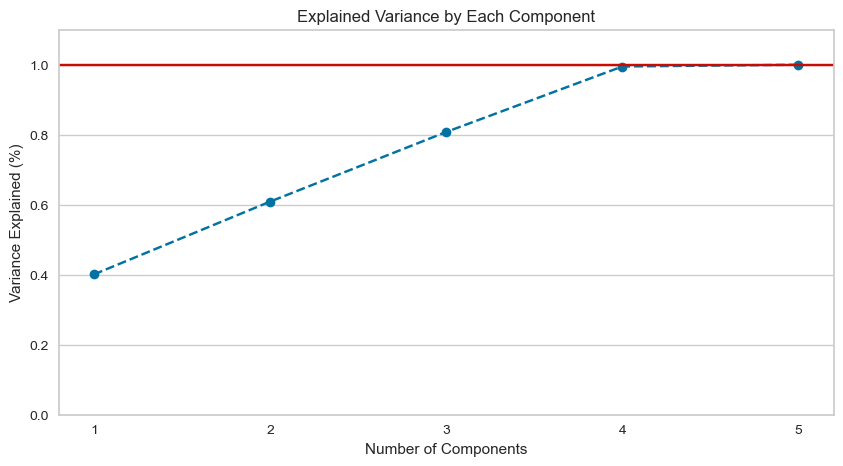

In [83]:
# Nombre de composantes principales
num_components = len(pca_df.columns)

# Création des valeurs pour l'axe x
xi = np.arange(1, 1 + num_components, step=1)

# Calcul de la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracé de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 5))
plt.plot(xi, cumulative_variance, marker='o', linestyle='--', color='b')

# Configuration des axes et du titre
plt.ylim(0.0, 1.1)
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Each Component')

# Ajout d'une ligne rouge à 1 pour la référence
plt.axhline(y=1, color='r', linestyle='-')

# Affichage de la grille seulement sur l'axe y
plt.gca().xaxis.grid(False)

# Affichage du graphique
plt.show()

les dernières composantes principales (dans ce cas, les composantes 4 et 5) ont une variance expliquée de 100%, cela signifie que ces composantes capturent toute la variance restante non expliquée par les composantes précédentes.

Pour le reste de notre études nous continuons avec RFM data et review Score.

# classification ascendante hiérarchique (CAH)

## Choix de meilleurs nombres des clusters

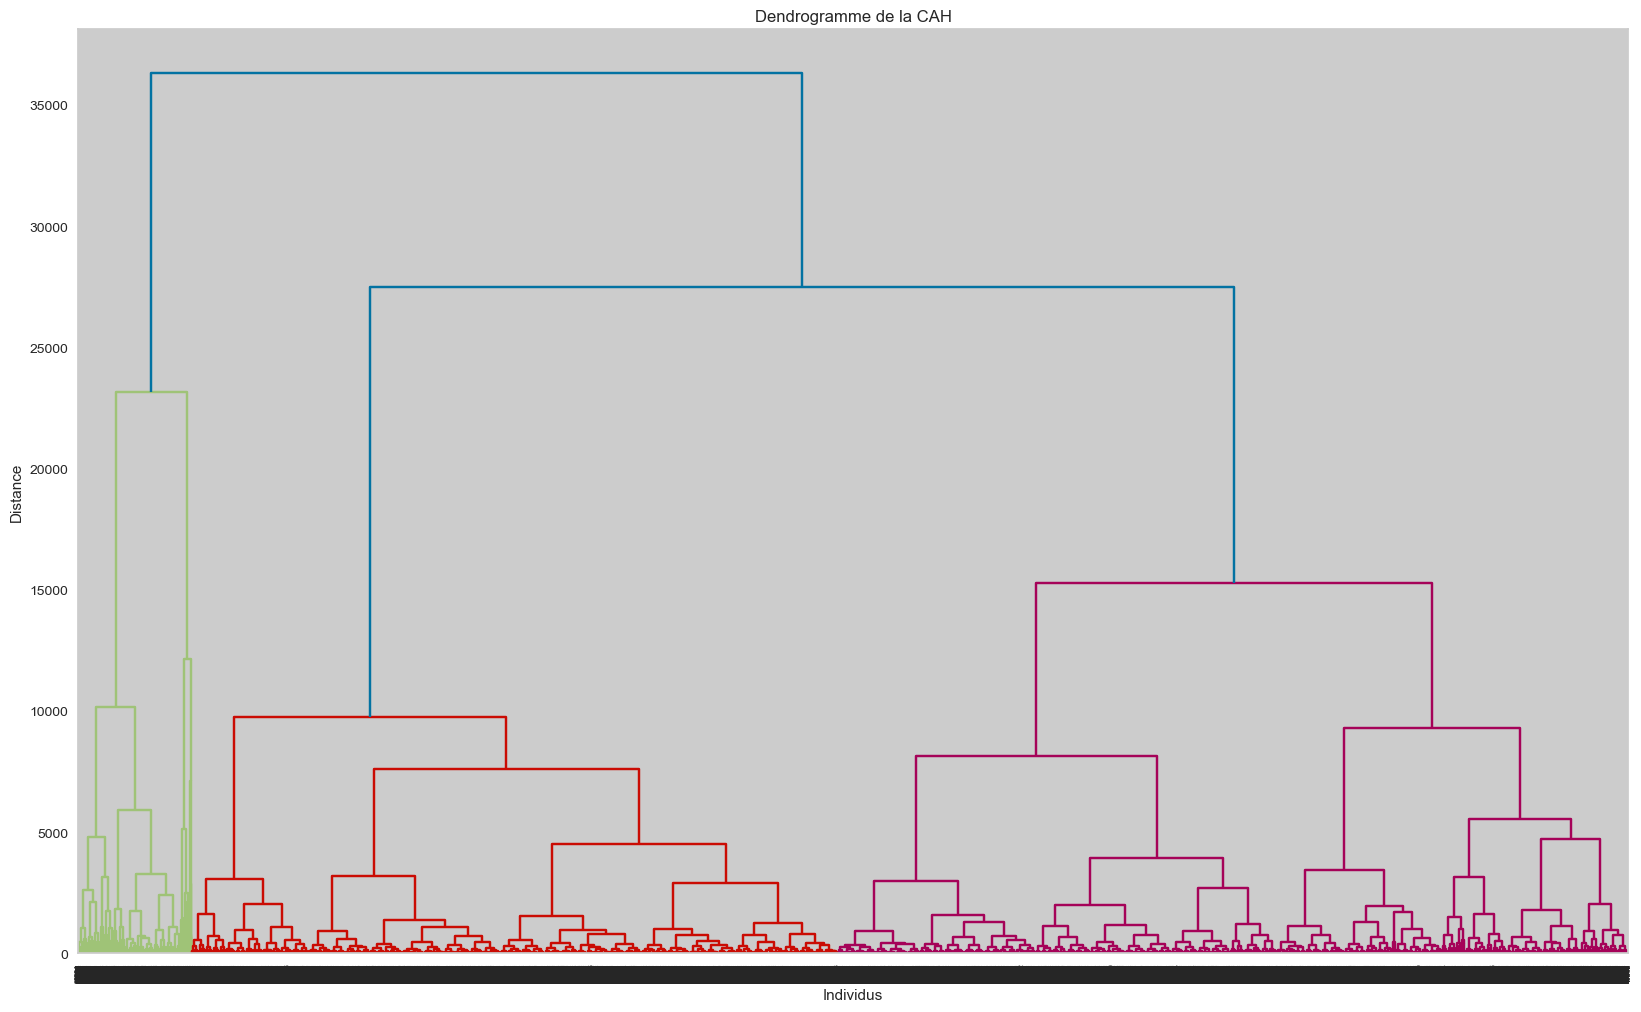

In [85]:
echantillon = RFM_data.sample(frac=0.3, random_state=42)
X = echantillon[['Recency', 'Frequency', 'monetary','average_review_score']]
dist_matrix = linkage(X, method='ward')
plt.figure(figsize=(20, 12))
dendrogram(dist_matrix)
plt.title('Dendrogramme de la CAH')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

Après avoir analysé le dendrogramme, le point de coupe optimal est clairement défini à cinq clusters distincts. Cette conclusion est appuyée par la présence de branches distinctes à ce niveau, indiquant une séparation significative entre les groupes. Ainsi, choisir cinq clusters permet de capturer efficacement la structure des données tout en évitant la complexité excessive.

In [86]:
cah = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = cah.fit_predict(X)
echantillon['Cluster'] = cluster_labels
echantillon[['customer_unique_id', 'Cluster']].head()

,customer_unique_id,Cluster
52346,8f9c0dc510c12654a35d2add7a6c5d34,4
21769,3b718dafac17bbd4d4b6a6161d75f179,3
76881,d2689462f11aec2bd4c942d59046bdd8,4
31690,569afd870e3085df248dd2a9ed77621a,2
45614,7cbfdb67d344d745e097fbb2a570c9e6,3


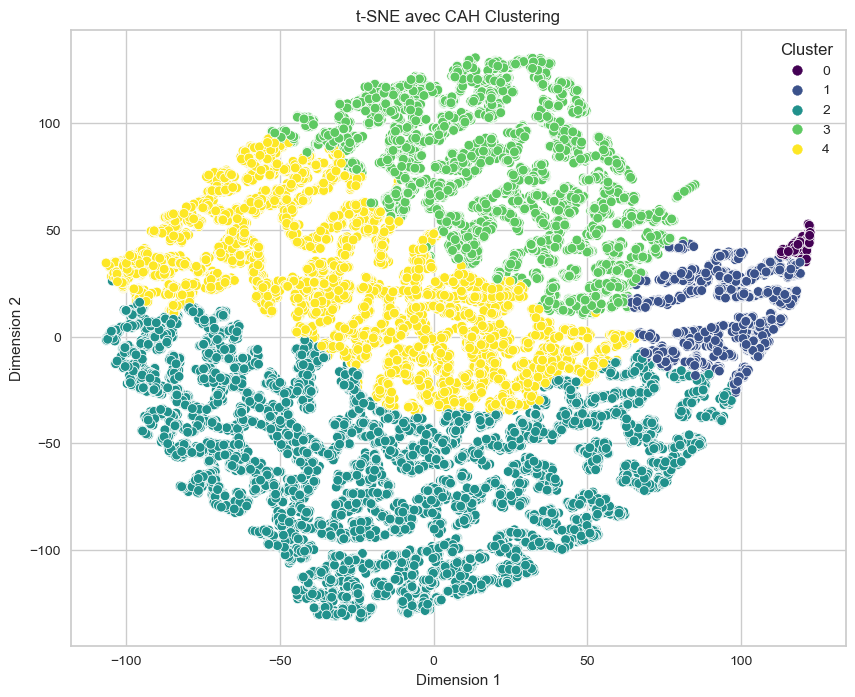

                     customer_unique_id  Cluster
52346  8f9c0dc510c12654a35d2add7a6c5d34        4
21769  3b718dafac17bbd4d4b6a6161d75f179        3
76881  d2689462f11aec2bd4c942d59046bdd8        4
31690  569afd870e3085df248dd2a9ed77621a        2
45614  7cbfdb67d344d745e097fbb2a570c9e6        3


In [88]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Création du DataFrame avec les données t-SNE
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = cluster_labels

# Tracé du t-SNE avec des couleurs représentant les clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Dimension 1', y='Dimension 2', hue='Cluster', palette='viridis', legend='full')
plt.title('t-SNE avec CAH Clustering')
plt.show()

# Affichage des échantillons avec leur cluster
print(echantillon[['customer_unique_id', 'Cluster']].head())

La combinaison de t-SNE avec un clustering CAH à cinq clusters offre une interprétation claire de la structure sous-jacente de nos données. Les cinq clusters distincts identifiés reflètent des sous-groupes homogènes avec des caractéristiques similaires, fournissant ainsi des insights précieux sur la distribution et les relations au sein de nos données.

# DBSCAN

## CHoix des meilleurs hyperparametres

https://medium.com/@revag2014/dbscan-an-easy-clustering-algorithm-and-also-how-to-optimize-it-using-grid-search-69a382b63e85

    epsilon (eps) : Il s'agit de la distance maximale entre deux échantillons pour qu'ils soient considérés comme dans le même voisinage.
    min_samples : Le nombre minimal d'échantillons dans un voisinage pour qu'un point soit considéré comme un point central.

In [93]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) == 1:  
        return -1
    else:
        return silhouette_score(X, labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

params = {'eps': [0.01,0.02,0.03,0.04, 0.05, 0.10],
          'min_samples': [2, 3, 4, 5, 6]}

dbscan = DBSCAN()

grid_search = GridSearchCV(dbscan, params, scoring=silhouette_scorer)
grid_search.fit(X_scaled)

print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'eps': 0.03, 'min_samples': 2}


In [94]:
dbscan_best = DBSCAN(eps=0.05, min_samples=2)
labels = dbscan_best.fit_predict(X)
print("Étiquettes des clusters:", labels)

Étiquettes des clusters: [-1 -1 -1 ... -1 -1 -1]


In [95]:
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

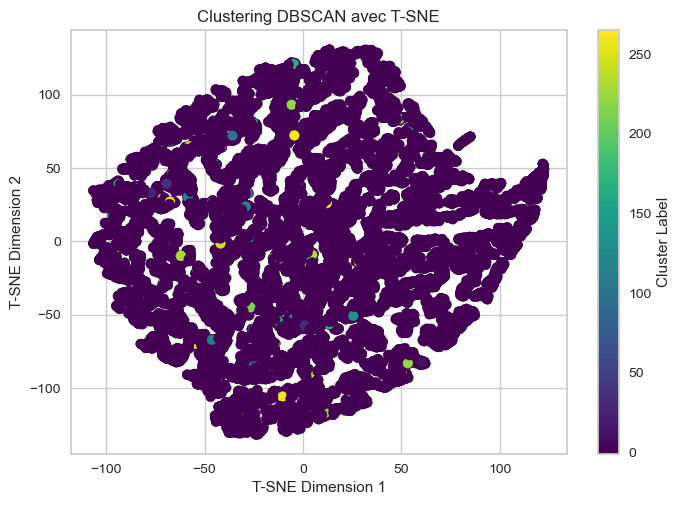

In [96]:
# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualisation des clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title('Clustering DBSCAN avec T-SNE')
plt.xlabel('T-SNE Dimension 1')
plt.ylabel('T-SNE Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

Dans ce cas, l'utilisation du DBSCAN n'est pas pertinente pour effectuer du clustering.

# Comparaison entre CAH et K-MEANS

In [97]:
X = echantillon[['Recency', 'Frequency', 'monetary', 'average_review_score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
nombre_de_clusters = 5  
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
cah = AgglomerativeClustering(n_clusters=nombre_de_clusters)
cah_labels = cah.fit_predict(X_scaled)
ari_score = adjusted_rand_score(kmeans_labels, cah_labels)
print("Score ARI entre KMeans et CAH:", ari_score)

Score ARI entre KMeans et CAH: 0.6071067741718862


un score ARI de 0.6071 suggère que les clusters produits par KMeans et CAH partagent une similitude significative dans la manière dont ils regroupent les données, mais il peut y avoir des différences dans la façon dont les points individuels sont attribués à certains clusters.